In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
conn = psycopg2.connect(dbname = 'postgres',
                        user = 'postgres',
                        password = 'password',
                        host = 'localhost',
                        port = '5432')

In [3]:
cursor = conn.cursor()

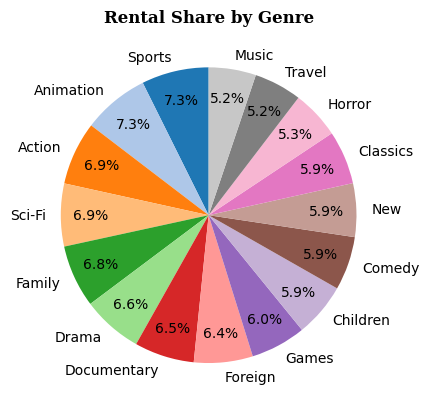

In [4]:
# Which movies are getting rented the most?
    # Desired output: film title, rental count
    # Need to join rental, inventory, film
    # film title (film) <1 to 1> film ID (film) <1 to M> inventory ID (inv) <1 to M> rental ID (rental)
# query1 = """    
#     SELECT film.title, COUNT(rental.inventory_id) AS rents 
#     FROM film 
#     FULL JOIN inventory ON film.film_id = inventory.film_id 
#     RIGHT JOIN rental ON inventory.inventory_id = rental.inventory_id 
#     GROUP BY film.title 
#     ORDER BY rents DESC
#         """
    # After figuring this out, I realized it doesn't need a plot
    # OK, which *categories* get rented the most?
        # Desired output: film category, rental count
        # Need to join 1. rental, 2. inventory, 3. film, 4. film_category, 5. category
query1 = """    
    SELECT category.name, COUNT(rental.inventory_id) AS rents 
    FROM category
    FULL JOIN film_category ON category.category_id = film_category.category_id 
    FULL JOIN film ON film_category.film_id = film.film_id
    FULL JOIN inventory ON film.film_id = inventory.film_id 
    RIGHT JOIN rental ON inventory.inventory_id = rental.inventory_id 
    GROUP BY category.name
    ORDER BY rents DESC
        """

cursor.execute(query1)
result1 = cursor.fetchall()

df1 = pd.DataFrame(result1)

cat_list = [row[0] for i, row in df1.iterrows()]
cat_vals = [row[1] for i, row in df1.iterrows()]
colors = plt.get_cmap('tab20').colors

plt.pie(cat_vals, labels = cat_list, autopct = '%.1f%%', startangle=90, pctdistance=0.8, colors=colors)
plt.title("Rental Share by Genre", fontname='serif', weight='heavy')
plt.show()


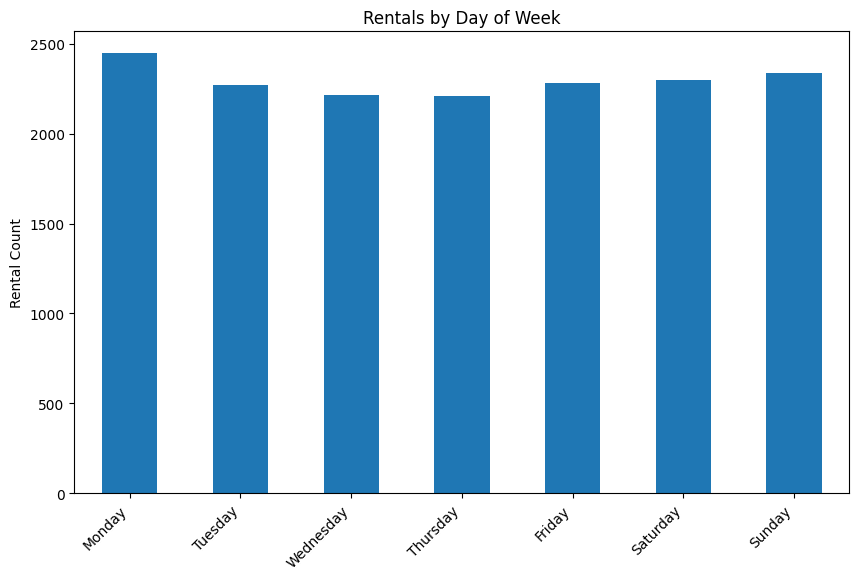

In [5]:
# What day of the week are rentals highest?
# Desired output: rental timestamp grouped by DoW
query2 = """ 
    SELECT rental_date
    FROM rental
    ORDER BY rental_date
"""
cursor.execute(query2)
result2 = cursor.fetchall()
def get_dow(entry):
    return entry.weekday()
result2WithDow = [(dt[0], get_dow(dt[0])) for dt in result2]

# Make dataframe
df2 = pd.DataFrame(result2WithDow, columns=['datetime', 'day_of_week'])

# group into day of week with day names
grouped_data = df2.groupby('day_of_week').size()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data.index = grouped_data.index.map(lambda x: day_names[x])

# plot
fig, ax = plt.subplots(figsize = (10, 6))
grouped_data.plot(kind = 'bar')
plt.title('Rentals by Day of Week')
plt.xlabel('')
plt.ylabel('Rental Count')
plt.xticks(rotation=45, ha='right')
plt.show()